# Zomato dataset Exploratory data analysis

## Importing the dependencies (required Libraries)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading and getting the data

In [7]:
ds = pd.read_csv(r'C:\Users\Aditya V\Desktop\Data Science\0_csv files\zomato.csv', encoding = 'latin-1')
# The data is converted from a .json file to .csv file, and sometimes it is encoded
# so we need to use some kind of encoding while reading the data

In [8]:
ds.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
ds.shape

(9551, 21)

In [10]:
ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
ds.info()
# whenever there is an object data, it might be text data, numerical or a categorical feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
ds.describe()
# describe function gives the basic statistics about the data (only numerical data)
# the stats for categorical or textual data is not given.

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis we do:

1) Explore Numerical variables

2) Explore Categorical variables

3) Finding and dealing with missing values

4) Relationships between features

## Missing values

In [13]:
ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We can see there are 9 missing values in the 'cuisines' column

In [14]:
# List comprehension
[features for features in ds.columns if ds[features].isnull().sum() > 0]

['Cuisines']

<Axes: >

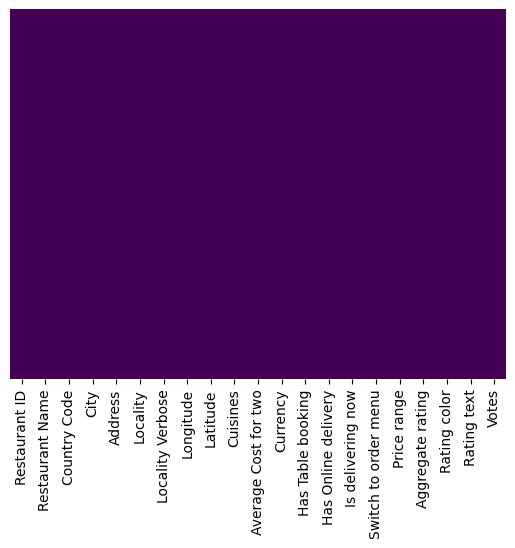

In [15]:
# visualizing missing values with heatmap
sns.heatmap(ds.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')
# we don't see the missing values because of the large size of data 9550 rows, and only 9 missing values..

## Getting the country code data from excel

In [18]:
ds_country = pd.read_excel(r'C:\Users\Aditya V\Desktop\Data Science\0_csv files\Country-Code.xlsx')

In [19]:
ds_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [20]:
final_ds = pd.merge(ds, ds_country, on = 'Country Code', how ='left')

In [21]:
final_ds.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [22]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [23]:
final_ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [24]:
final_ds.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Observations

In [25]:
# Seeing the different countries and the number of orders in each country

In [26]:
final_ds.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

## Pie chart for % of transactions in different countries

In [27]:
countries = final_ds.Country.value_counts().index

In [28]:
values = final_ds.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x21a72de4ad0>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

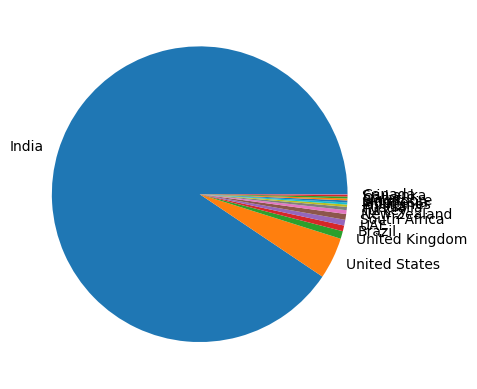

In [29]:
#Plotting a pie chart
plt.pie(values, labels = countries)

([<matplotlib.patches.Wedge at 0x21a750fe420>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

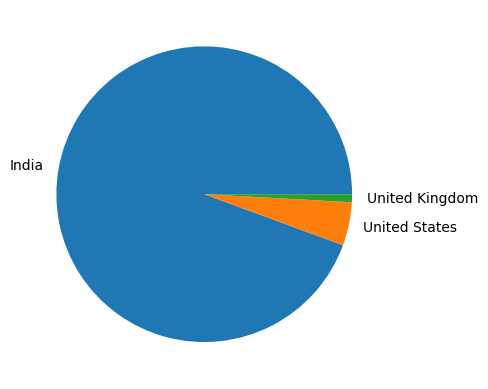

In [30]:
# Pie chart - top 3 countries where Zomato serves
plt.pie(values[:3], labels = countries[:3])

Observation : Zomato's top 3 transactions are in India, followed by the US and UK.

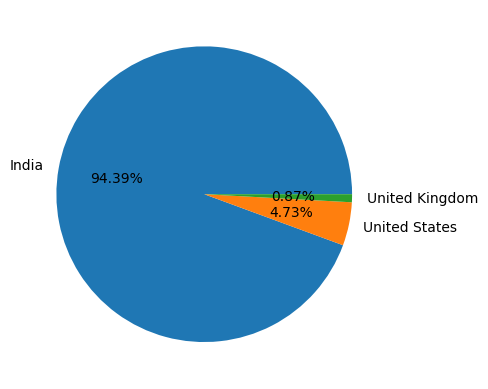

<Figure size 1500x800 with 0 Axes>

In [31]:
plt.pie(values[:3], labels = countries[:3], autopct = '%1.2f%%')
plt.figure(figsize = (15,8))
plt.savefig('Top3_countries.png')

## Ratings

In [32]:
final_ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

We can see there are three different types of ratings : 'Aggregate rating', 'Rating color', 'Rating text',

In [33]:
final_ds.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [34]:
ratings = final_ds.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0: 'Rating Count'})

In [35]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


**Observations:**

When Rating is between 4.5 to 4.9---> Excellent

When Rating are between 4.0 to 3.4--->very good

when Rating is between 3.5 to 3.9----> good

when Rating is between 3.0 to 3.4----> average

when Rating is between 2.5 to 2.9----> average

when Rating is between 2.0 to 2.4----> Poor

## Plotting the Ratings

In [36]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

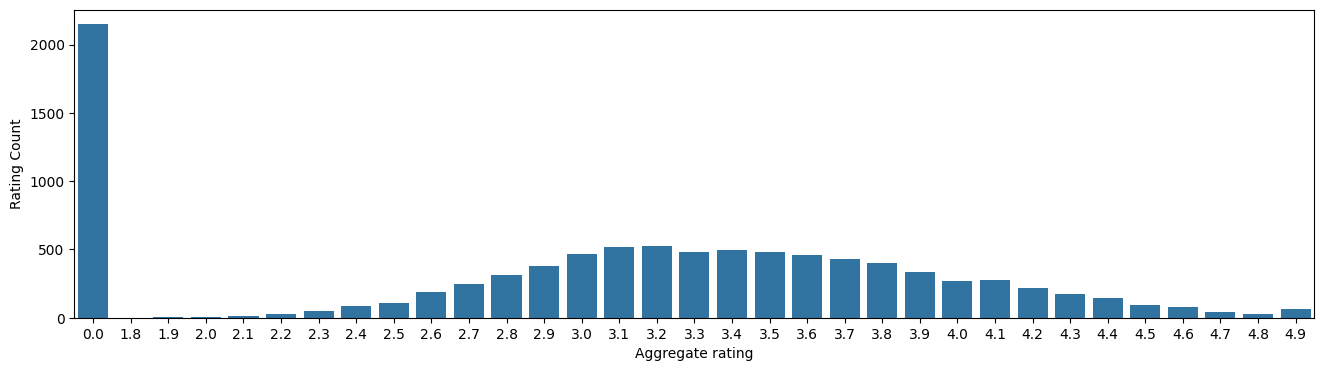

In [37]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', data = ratings)

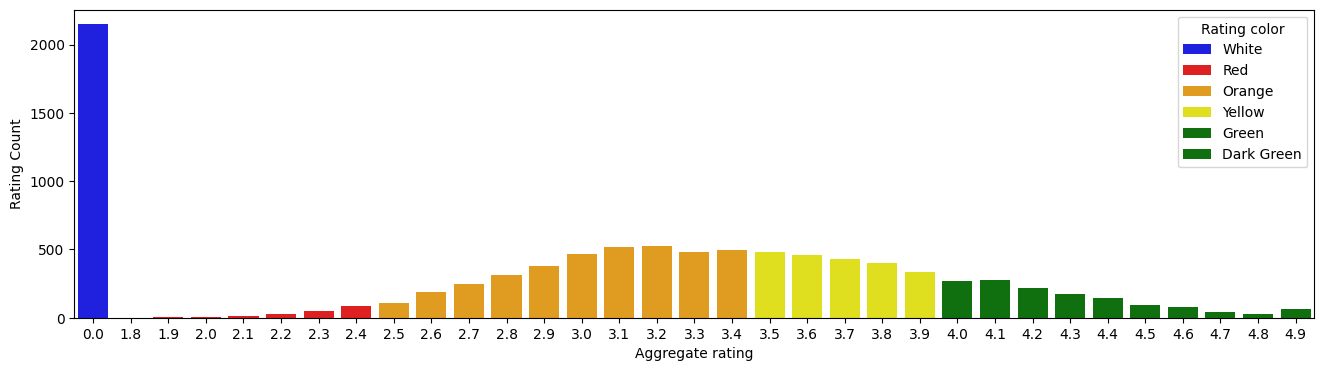

In [38]:
# Plotting the data according to the color scheme associated
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color', data = ratings, palette = ['blue', 'Red', 'Orange', 'Yellow', 'Green', 'Green'])
plt.savefig('Ratings_color_coded.png')
plt.show()

Observations

1) Not Rated Count is very high

2) The number of ratings between 2.5 to 3.8 is high

C:\Users\Aditya V\AppData\Local\Temp\ipykernel_17172\3925376377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Rating color', data = ratings, palette = ['blue', 'Red', 'Orange', 'Yellow', 'Green', 'Green'])


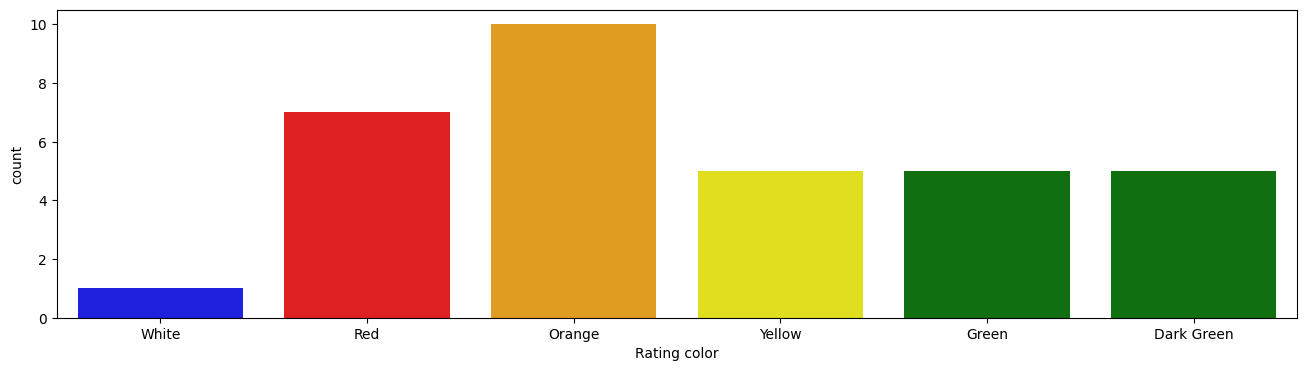

In [39]:
sns.countplot(x = 'Rating color', data = ratings, palette = ['blue', 'Red', 'Orange', 'Yellow', 'Green', 'Green'])
plt.savefig('Ratings_count.png')

## Finding out which country has given the most zero ratings

In [40]:
final_ds[final_ds['Rating color'] == 'White']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,No,No,No,No,1,0.0,White,Not rated,2,Brazil
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,No,3,0.0,White,Not rated,1,Brazil
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,Brazil
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,"Brazilian, Mineira",...,No,No,No,No,3,0.0,White,Not rated,2,Brazil
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,2,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,1,India


In [41]:
zero_ratings = final_ds[final_ds['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns = {0: 'Zero Ratings Count'})

In [42]:
zero_ratings

,Country,Zero Ratings Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


So we can see that India has the most number of zero ratings for zomato


In [43]:
# sns.barplot(x = 'Country', y = 'Zero Ratings Count', palette = 'RdBu_r', data = zero_ratings)

In [44]:
final_ds[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index().rename(columns = {0: 'Count'})

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Which countries have an online delivery option

In [45]:
final_ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [46]:
final_ds['Has Online delivery']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 9551, dtype: object

In [47]:
final_ds[final_ds['Has Online delivery'] == 'Yes']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
565,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,No,Yes,No,No,4,4.6,Dark Green,Excellent,376,UAE
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,Al Dhafrah,"Al Dhafrah, Abu Dhabi",54.381931,24.485579,"Italian, Pizza",...,Yes,Yes,No,No,3,4.4,Green,Very Good,471,UAE
571,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Yes,Yes,No,No,4,4.4,Green,Very Good,246,UAE
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Yes,Yes,No,No,3,4.0,Green,Very Good,355,UAE
573,5700386,Sangeetha Vegetarian Restaurant,214,Abu Dhabi,"Opposite Cristal Hotel, Behind KM Trading, Ele...",Madinat Zayed,"Madinat Zayed, Abu Dhabi",54.363776,24.485253,"Indian, South Indian",...,No,Yes,No,No,2,3.6,Yellow,Good,268,UAE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,11371,Chili's,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...","Phoenix Market City, Viman Nagar","Phoenix Market City, Viman Nagar, Pune",73.916619,18.562450,"Mexican, American, Tex-Mex",...,Yes,Yes,No,No,3,4.5,Dark Green,Excellent,1439,India
9168,18292672,Blue Water,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",Ravet,"Ravet, Pune",73.751081,18.636215,"North Indian, Chinese, Continental",...,Yes,Yes,No,No,3,4.2,Green,Very Good,487,India
9170,6507967,Tales & Spirits,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",Senapati Bapat Road,"Senapati Bapat Road, Pune",73.828972,18.530963,"Italian, Continental, Cafe",...,Yes,Yes,No,No,2,4.1,Green,Very Good,997,India
9171,6506206,18 Degrees Resto Lounge,1,Pune,"8th & 9th Floor, Spot 18 Mall, Pimple Saudagar...","Spot 18 Mall, Pimple Saudagar","Spot 18 Mall, Pimple Saudagar, Pune",73.785901,18.593481,"North Indian, Mediterranean, Chinese",...,Yes,Yes,No,No,4,3.6,Yellow,Good,1566,India


In [48]:
final_ds[final_ds['Has Online delivery'] == 'Yes'].groupby(['Country']).size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [49]:
final_ds[['Has Online delivery', 'Country']].groupby(['Has Online delivery', 'Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observations:

India and UAE have the online delivery option in Zomato

## Creating the city distribution in India

In [50]:
final_ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [51]:
final_ds.groupby('City').size()

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
ÛÁstanbul          14
Length: 141, dtype: int64

In [52]:
final_ds[final_ds['Country'] == 'India']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,No,No,No,No,2,3.6,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,No,No,No,No,2,3.7,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,No,No,No,No,2,4.3,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.8,Yellow,Good,74,India


In [53]:
cities_df = final_ds[final_ds['Country'] == 'India'].groupby('City').size().reset_index().rename(columns = {0: 'Count'})

In [54]:
cities_df

,City,Count
0,Agra,20
1,Ahmedabad,21
2,Allahabad,20
3,Amritsar,21
4,Aurangabad,20
5,Bangalore,20
6,Bhopal,20
7,Bhubaneshwar,21
8,Chandigarh,18
9,Chennai,20


([<matplotlib.patches.Wedge at 0x21a75323a10>,
 [Text(3.299912982063658, 0.023964782655776153, 'Agra'),
  Text(3.299190545196894, 0.07308725253710281, 'Ahmedabad'),
  Text(3.2977369122856146, 0.1221935241694264, 'Allahabad'),
  Text(3.2955524054969136, 0.17127271418269402, 'Amritsar'),
  Text(3.2926375089806776, 0.22031394520892272, 'Aurangabad'),
  Text(3.2890904386308204, 0.2681120782570609, 'Bangalore'),
  Text(3.28484953533825, 0.3158536531181548, 'Bhopal'),
  Text(3.279783478167951, 0.36471953105987975, 'Bhubaneshwar'),
  Text(3.2742899548715534, 0.4111268556385514, 'Chandigarh'),
  Text(3.2683057120357857, 0.45626502460111734, 'Chennai'),
  Text(3.261334318848959, 0.5036848823401386, 'Coimbatore'),
  Text(3.253674947867104, 0.5509984878581784, 'Dehradun'),
  Text(3.183803419073815, 0.8679837490955048, 'Faridabad'),
  Text(3.0809871385508063, 1.182166761537693, 'Ghaziabad'),
  Text(3.0612603833106022, 1.2323493277366713, 'Goa'),
  Text(2.3087519993499868, 2.357894019140267, 'Gurga

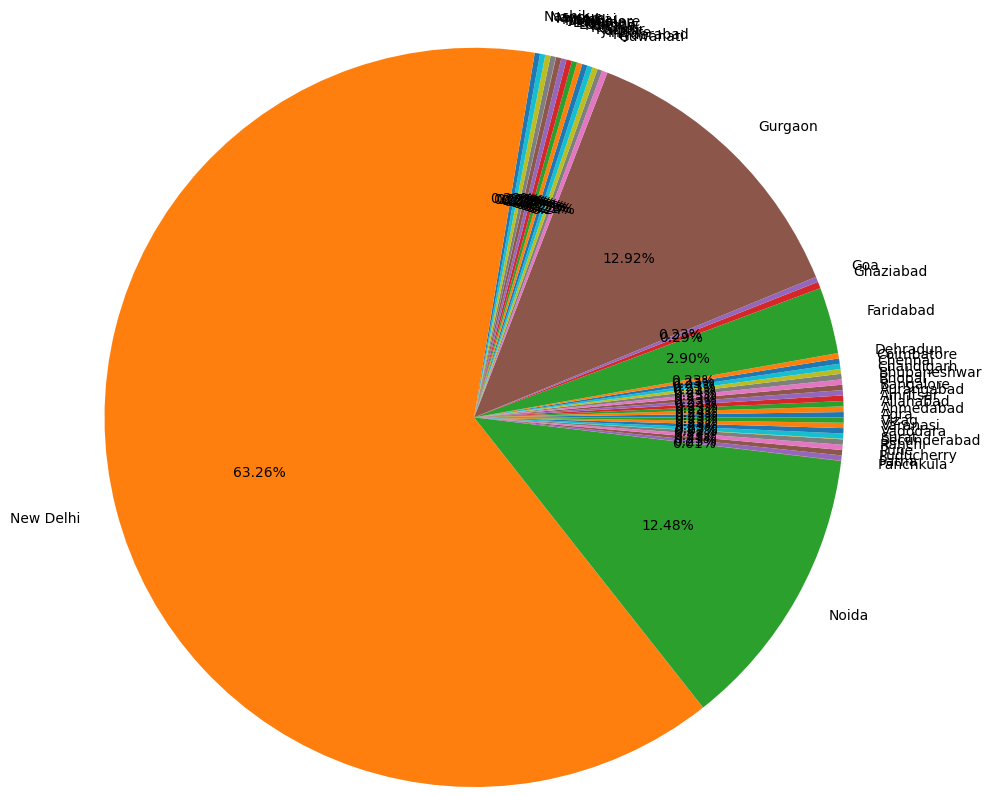

In [55]:
plt.pie(cities_df['Count'], labels = cities_df['City'], autopct = '%1.2f%%', radius = 3)

plotting for the top 5 cities ordering in Zomato across India

In [56]:
cities_df.nlargest(n=5, columns = 'Count')

,City,Count
31,New Delhi,5473
15,Gurgaon,1118
32,Noida,1080
12,Faridabad,251
13,Ghaziabad,25


In [57]:
plotting_data = cities_df.nlargest(n=5, columns = 'Count')

In [58]:
val = plotting_data['Count']
labels = plotting_data['City']

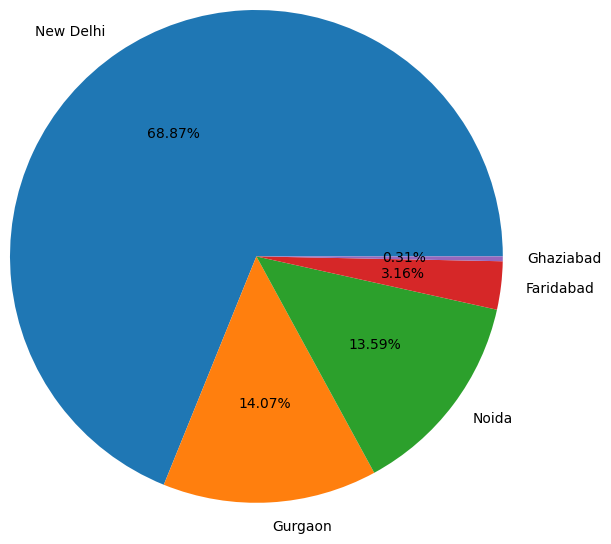

In [59]:
plt.pie(val, labels = labels, autopct = '%1.2f%%', radius = 2)
plt.savefig('Top5_cities_ordered_in_India.png')
plt.show()

We can see mostly the Northen parts of the country are ordering from Zomato as of this data

## Find the top 10 cuisines

In [60]:
final_ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [61]:
final_ds['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [62]:
final_ds['Cuisines'].value_counts().reset_index()

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
...,...,...
1820,"Bengali, Fast Food",1
1821,"North Indian, Rajasthani, Asian",1
1822,"Chinese, Thai, Malaysian, Indonesian",1
1823,"Bakery, Desserts, North Indian, Bengali, South...",1


In [63]:
final_ds['Cuisines'].value_counts().reset_index().rename(columns = {'index' : 'Cuisine', 'Cuisines' : 'Count'})

,Count,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
...,...,...
1820,"Bengali, Fast Food",1
1821,"North Indian, Rajasthani, Asian",1
1822,"Chinese, Thai, Malaysian, Indonesian",1
1823,"Bakery, Desserts, North Indian, Bengali, South...",1


In [67]:
cuisines_data = final_ds['Cuisines'].value_counts().reset_index().rename(columns = {'index' : 'Cuisine', 'Cuisines' : 'Count'})

In [69]:
cuisines_data

,Count,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
...,...,...
1820,"Bengali, Fast Food",1
1821,"North Indian, Rajasthani, Asian",1
1822,"Chinese, Thai, Malaysian, Indonesian",1
1823,"Bakery, Desserts, North Indian, Bengali, South...",1


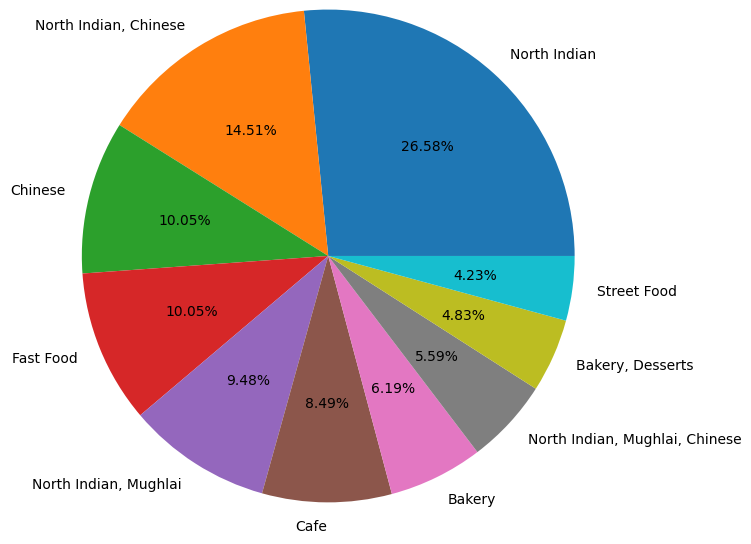

In [71]:
plt.pie(cuisines_data['count'][:10], labels = cuisines_data['Count'][:10], autopct = '%1.2f%%', radius = 2)
plt.savefig('Top10_cuisines.png')
plt.show()

These are the top 10 that are being ordered on Zomato